# Generating a Survey Layout in Grid Pattern using Python
**--------Problem Statement--------**
* Survey to be carried out in Toposheet 58K11
* Sample to be collected at every 1 km interval in square grid
* Toposheets has an extent of 15 minutes(0.25 degrees) along Longitude and Latitude
* Assuming 1 degree is equivalent to 110km(Approximately), a toposheet has dimension of (27.5 km X 27.5 km)
* The grid would have total 28 points along X(Longitude) and 28 points along Y(Latitude) i.e.total 28X28=784 points
* Finally the grid coordinates would be saved to csv file
* We finally visualize this grid on mobile Google Map (Can be used as a tool for field work)

In [1]:
# Import the essential libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declaring the number of points and total points
Long_points=28
Lat_points=28
Total_points=Long_points*Lat_points
print(Total_points)

784


In [3]:
# Declaring two numpy arrays for storing Longitude coordinates and Latitude coordinates
# For 784 points, we need arrays of length 784
Long=np.zeros(Total_points)
Lat=np.zeros(Total_points)
station_id=np.zeros(Total_points) # ID number of the locations
print(len(Long), len(Lat))

784 784


In [4]:
# Declaring the parameters required for generating the grid
Long_min=78.5
Long_max=78.75
Lat_min=17.25
Lat_max=17.5


interval_m=1000    # Grid interval(in meter) declaration
interval_dd=interval_m/110000   # Grid interval(in degree decimal) 
# 110000 m = 1 degree
# 1 m      = 1/110000 degree
# 1000 m   = 1000/110000 degree

In [5]:
# This is our main program to calculate the sample location points
# The for loop works like this: 
# 1)Keep Longitude fixed at Long_min value and lay out all points along Latitude, starting from Lat_min until Latitude does not cross the Lat_max value. 
# 2)Next increase the Longitude by interval_dd and again keep it fixed. Repeat step 1.
# 3)Repeat step 1) and 2) until Longitude does not cross the Long_max value.
temp_Long=Long_min
temp_Lat=Lat_min
Lat[0]=Lat_min                            # We know that the first latitude would be the minimum Latitude
k=0                                       # This index is initialized to 0 and it keeps track of all the 784 grid points
for i in range(Long_points):              # This loop takes care of 28 points along Longitude ( i ranges from 0-27 )
    for j in range(Lat_points):           # This loop takes care of 28 points along Latitude ( j ranges from 0-27 )
        Lat[k]=Lat_min+(j)*interval_dd    # Inside j loop j increases from 0 to 27. Therefore Latitude values increase from Lat_min to upto Lat_max
        Long[k]=Long_min+(i)*interval_dd  # Inside j loop i is constant. Therefore Longitude values remain constant. Longitude
        station_id[k]=k
        #print(i, Long[k], Lat[k])         # print the values to check if everything works out correctly or not
        k=k+1                             # Keep increasing k everytime j increases and i increases from 0-27(Therefore k ranges from 0-28*28 i.e. 784)

output = np.column_stack((station_id,Long,Lat))            # Stacking Longitude and Latitude arrays side by side to create a 2D array of dimension 784X2
#print(output)


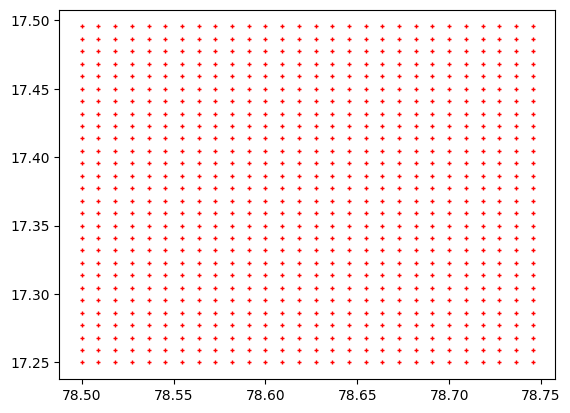

In [6]:
plt.plot(Long, Lat, '+', ms=3, color='red')

In [7]:
# Save the grid points to csv file(current folder) for later use
np.savetxt("58K11_Survey_Layout.csv",output,delimiter=',',fmt='%3.0f, %2.4f, %2.4f', header='Station_id, Longitude, Latitude')   

# Showing the Survey grid on google map for field work
* Search 'Create Google Map' on Google
* Go to 'My Maps'(usually the first link) -> Get Started (You need to have your Google account logged in)
* Click on 'Create a new map' -> Create
* 'Import'-> Upload -> Browse and select the file("58K11_Survey_Layout.csv")
* Assign the coordinate headers and and station_id as marker names
* Change map name from 'Untitled' to '58K11'(Say)
* Finish
* Next open Google map on phone
* At bottom-middle click on 'Saved'
* Scroll Down -> Maps 
* Select the Map '58K11' and you are good to go!
* Touch on any pin to see its Station ID(Click on More Info to see the Long, lat)

In [8]:
# For not using the map anymore, follow as above, select the map again. 
# Click 'View map Legend'-> Close
# Now you return to your default view